In [48]:
import matplotlib.pyplot as plt
import matplotlib
import os
import pandas as pd
import numpy as np
%matplotlib inline
matplotlib.style.use('ggplot')
import datetime
import locale
import time
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')
import glob

import ipywidgets
from IPython.display import display

In [907]:
product = 'apio'
tipo = 'production/'
pwd = '/Volumes/Macintosh HD/_GitHub/journey-of-food/data/producto/'
aux = '/Volumes/Macintosh HD/_GitHub/journey-of-food/data/aux/'

In [908]:
tipos = os.listdir(pwd)[1:]

In [909]:
dropdown = ipywidgets.Dropdown(
    options = tipos,
    value = 'ajo')
display(dropdown)

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        print("changed to %s" % change['new'])
dropdown.observe(on_change)

A Jupyter Widget

changed to col
changed to espinaca
changed to haba
changed to kiwi
changed to lima
changed to limon
changed to mandarina
changed to nabo
changed to naranja
changed to uva
changed to zanahoria
changed to sandia
changed to remolacha
changed to rabano
changed to puerro
changed to pomelo
changed to platano
changed to pina
changed to pimiento
changed to pera
changed to pepino
changed to patata
changed to papaya
changed to nectarina
changed to naranja
changed to nabo
changed to mora
changed to melon


In [1896]:
product = dropdown.value
productPATH = product + '/'

In [1897]:
products = os.listdir(pwd)
os.chdir(pwd+productPATH+tipo)
files = glob.glob(pwd+productPATH+tipo+'*.xlsx')
files

['/Volumes/Macintosh HD/_GitHub/journey-of-food/data/producto/melon/production/exec13_6.21.3.xlsx',
 '/Volumes/Macintosh HD/_GitHub/journey-of-food/data/producto/melon/production/exec13_6.21.4.xlsx']

In [1901]:
data = pd.read_excel(files[0],skiprows=[0,1,2,3,4,5], encoding ='utf-8')
data.fillna(0,inplace=True)

In [1902]:
data.head(2)

,Unnamed: 0,Unnamed: 1,Aire libre,Protegido,Unnamed: 4,Unnamed: 5,Aire libre.1,Protegido.1,Unnamed: 8
0,A Coruña,–,–,–,–,–,–,–,–
1,Lugo,–,–,–,–,–,–,–,–


In [1903]:
data[data.columns[0]].head()

0      A Coruña
1          Lugo
2       Ourense
3    Pontevedra
4       GALICIA
Name: Unnamed: 0, dtype: object

In [1904]:
data = pd.DataFrame([data[data.columns[0]], data[data.columns[-1]]]).transpose()

In [1905]:
data.head()

,Unnamed: 0,Unnamed: 8
0,A Coruña,–
1,Lugo,–
2,Ourense,–
3,Pontevedra,–
4,GALICIA,–


In [1906]:
data.columns = ['Provincia','P-t']

In [1907]:
data.Provincia.unique()

array(['A Coruña', 'Lugo', 'Ourense', 'Pontevedra', ' GALICIA', 0,
       ' P. DE ASTURIAS', ' CANTABRIA', 'Alava', 'Guipúzcoa', 'Vizcaya',
       ' PAÍS VASCO', ' NAVARRA', ' LA RIOJA', 'Huesca', 'Teruel',
       'Zaragoza', ' ARAGÓN', 'Barcelona', 'Girona', 'Lleida', 'Tarragona',
       ' CATALUÑA', ' BALEARES', 'Avila', 'Burgos', 'León', 'Palencia',
       'Salamanca', 'Segovia', 'Soria', 'Valladolid', 'Zamora',
       ' CASTILLA Y LEÓN', ' MADRID', 'Albacete', 'Ciudad Real', 'Cuenca',
       'Guadalajara', 'Toledo', ' CASTILLA-LA MANCHA', 'Alicante',
       'Castellón', 'Valencia', ' C. VALENCIANA', ' R. DE MURCIA',
       'Badajoz', 'Cáceres', ' EXTREMADURA', 'Almería', 'Cádiz', 'Córdoba',
       'Granada', 'Huelva', 'Jaén', 'Málaga', 'Sevilla', ' ANDALUCÍA',
       'Las Palmas', 'S.C. de Tenerife', ' CANARIAS', 'ESPAÑA'], dtype=object)

In [1908]:
data = data.loc[data.Provincia!=0]
data = data.loc[data['Provincia'] != ' GALICIA']
data = data.loc[data['Provincia'] != ' PAÍS VASCO']
data = data.loc[data['Provincia'] != ' PAIS VASCO']
data = data.loc[data['Provincia'] != ' ARAGÓN']
data = data.loc[data['Provincia'] != ' ARAGON']
data = data.loc[data['Provincia'] != ' CATALUÑA']
data = data.loc[data['Provincia'] != ' CASTILLA Y LEÓN']
data = data.loc[data['Provincia'] != ' CASTILLA Y LEON']
data = data.loc[data['Provincia'] != ' CASTILLA-LA MANCHA']
data = data.loc[data['Provincia'] != ' C. VALENCIANA']
data = data.loc[data['Provincia'] != ' EXTREMADURA']
data = data.loc[data['Provincia'] != ' ANDALUCÍA']
data = data.loc[data['Provincia'] != ' ANDALUCIA']
data = data.loc[data['Provincia'] != ' CANARIAS']
data = data.loc[data['Provincia'] != ' C. VALENCIANA']
data = data.loc[data['Provincia'] != 'ESPAÑA']
#data = data.loc[data['Provincia'] != 'Las Palmas']
#data = data.loc[data['Provincia'] != 'S.C. de Tenerife']

In [1909]:
data['P-t'].replace('–',0,inplace=True)
data.head()

,Provincia,P-t
0,A Coruña,0
1,Lugo,0
2,Ourense,0
3,Pontevedra,0
6,P. DE ASTURIAS,0


In [1910]:
data.Provincia.values

array(['A Coruña', 'Lugo', 'Ourense', 'Pontevedra', ' P. DE ASTURIAS',
       ' CANTABRIA', 'Alava', 'Guipúzcoa', 'Vizcaya', ' NAVARRA',
       ' LA RIOJA', 'Huesca', 'Teruel', 'Zaragoza', 'Barcelona', 'Girona',
       'Lleida', 'Tarragona', ' BALEARES', 'Avila', 'Burgos', 'León',
       'Palencia', 'Salamanca', 'Segovia', 'Soria', 'Valladolid', 'Zamora',
       ' MADRID', 'Albacete', 'Ciudad Real', 'Cuenca', 'Guadalajara',
       'Toledo', 'Alicante', 'Castellón', 'Valencia', ' R. DE MURCIA',
       'Badajoz', 'Cáceres', 'Almería', 'Cádiz', 'Córdoba', 'Granada',
       'Huelva', 'Jaén', 'Málaga', 'Sevilla', 'Las Palmas',
       'S.C. de Tenerife'], dtype=object)

In [1911]:
dataCanarias = data[(data.Provincia =='Las Palmas') | (data.Provincia == 'S.C. de Tenerife')]
data = data[(data.Provincia !='Las Palmas') & (data.Provincia != 'S.C. de Tenerife')]
dataCanarias.head()

,Provincia,P-t
73,Las Palmas,3293
74,S.C. de Tenerife,1660


In [1912]:
provincias = pd.read_csv(aux+'provincias.csv', delimiter='\t',index_col=1)

In [1913]:
data.Provincia = data.Provincia.apply(lambda x: x.upper())

In [1914]:
data.sort_values('P-t',ascending=False).head(1)

,Provincia,P-t
57,R. DE MURCIA,189013


In [1915]:
data['INE'] = data.Provincia.map(provincias.ID)

In [1916]:
data.sort_values('P-t',ascending=False).head(1)

,Provincia,P-t,INE
57,R. DE MURCIA,189013,30


In [1917]:
provincias_name = provincias = pd.read_csv(aux+'provincias_nombre_es.csv',index_col=1)

In [1918]:
data.Provincia = data.INE.map(provincias_name.ID)

In [1919]:
datos = data.sort_values('P-t',ascending=False).head(1)

In [1920]:
datos.head()

,Provincia,P-t,INE
57,Murcia,189013,30


In [1921]:
datos.to_csv(pwd+productPATH+tipo+'principal_provincia_peninsula.csv',encoding='utf-8')

In [1922]:
#data = data.loc[data.index<73]

In [1923]:
data.sort_values('P-t',ascending=False,inplace=True)

In [1924]:
head = data[:3]
tail = data[3:]

In [1925]:
tail = pd.DataFrame(tail.sum()).transpose()
tail.Provincia = 'Resto de España'
tail.INE = 0
tail.head()

,Provincia,P-t,INE
0,Resto de España,195735,0


In [1926]:
grafico = pd.concat([head,tail])

In [1927]:
grafico.set_index('Provincia',inplace=True)

In [1928]:
grafico['Percent'] = grafico['P-t']/sum(grafico['P-t'])*100.00
grafico.Percent = grafico.Percent.astype('float')
grafico.Percent = grafico.Percent.round(2)
grafico.head()

,P-t,INE,Percent
Provincia,,,
Murcia,189013,30,27.51
Ciudad Real,187500,13,27.29
Almería,114855,4,16.72
Resto de España,195735,0,28.49


In [1929]:
grafico.to_csv(pwd+productPATH+tipo+'grafico.csv', encoding='utf-8')

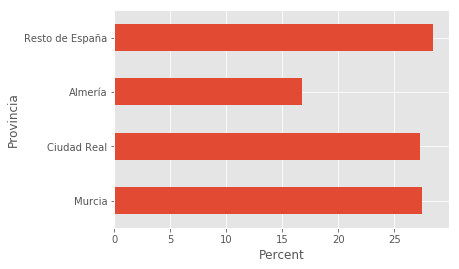

In [1930]:
grafico['Percent'].plot('barh')
plt.xlabel('Percent')
plt.savefig(product+'.png')

In [1931]:
data.to_csv(pwd+productPATH+tipo+'production_ready_INE.csv', encoding='utf-8')

In [1932]:
data.head()

,Provincia,P-t,INE
57,Murcia,189013,30
46,Ciudad Real,187500,13
63,Almería,114855,4
59,Badajoz,36790,6
52,Alicante,29071,3


In [1933]:
total = pd.DataFrame(pd.DataFrame(data.sum()).transpose())
total.Provincia = 'España'
total.INE = 0
total.drop('INE',axis = 1, inplace=True)
total

,Provincia,P-t
0,España,687103


In [1934]:
try:
    dataCanarias = pd.DataFrame(dataCanarias.sum()).transpose()
except:
    print('No datos canarias')

In [1935]:
dataCanarias.Provincia = 'Canarias'

In [1936]:
total = total.append(dataCanarias)

In [1937]:
total.set_index('Provincia',inplace=True)

In [1938]:
total.head()

,P-t
Provincia,
España,687103
Canarias,4953


In [1939]:
total.to_csv(pwd+productPATH+tipo+'total.csv', encoding='utf-8')

In [1940]:
#dataMelt = pd.melt(data, id_vars='Provincia', value_vars=['S-ha_15/12-15/4','P-t_15/12-15/4','S-ha_15/4-15/6','P-t_15/4-15/6','S-ha_15/6-15/9','P-t_15/6-15/9','S-ha_15/9-15/1','P-t_15/9-15/1'])

In [1895]:
#dataMelt['Unit'] = dataMelt['variable']
#dataMelt['Unit'] = dataMelt['Unit'].apply(lambda x: x.split('_')[0])
#dataMelt['variable'] = dataMelt['variable'].apply(lambda x: x.split('_')[1])

In [1804]:
#dataMelt.columns =['Provincia', 'Variable', 'Cantidad', 'Unit']

In [173]:
#dataMelt['nonumeric'] = dataMelt.Cantidad.apply(lambda x: isinstance(x, int))

In [174]:
#dataMelt = dataMelt.loc[dataMelt.nonumeric == True]

In [ ]:
#dataMelt.drop('nonumeric', axis=1, inplace=True)

In [ ]:
#dataMelt.to_csv(product+'_production_ready_melt.csv', encoding='utf-8')

In [ ]:
#dataMelt['Cantidad'] = dataMelt['Cantidad'].astype('int')*1000.0

In [ ]:
#dataMelt.pivot_table(index='Variable', values='Cantidad', aggfunc='sum').Cantidad.plot('bar')

In [ ]:
#dataMelt.info()